In [19]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load the cleaned learning outcomes
data = pd.read_csv('./datasets/cleaned-lo-dataset.csv')
job_data = pd.read_csv('./datasets/cleaned-job-descriptions.csv')

# Function to display the top words for each topic


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print("\t" + " ".join([feature_names[i]
              for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 10
n_topics = 20

job_stopwords = nltk.corpus.stopwords.words('english')
job_stopwords.extend(['new', 'one', 'must', 'job', 'per',
                     'ceo', 'work', 'may', 'pay', 'youll', 'never'])
lo_stopwords = nltk.corpus.stopwords.words('english')
lo_stopwords.extend(['use', 'using', 'students', 'able', 'skills', 'develop', 'identify', 'understand', 'demonstrate', 'cms', 'en', 'levelappropriate',
                    'ontario', 'explain', 'describe', 'include', 'understanding', 'apply', 'within', 'appropriate'])


# Job Description LDA
job_vectorizer = CountVectorizer(
    stop_words=job_stopwords, max_df=0.95, min_df=2)
job_count_data = job_vectorizer.fit_transform(job_data['job_description'])
# Create the LDA model
job_lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
job_lda.fit(job_count_data)

# print("Job Topics:\n")
# display_topics(job_lda, job_vectorizer.get_feature_names_out(), no_top_words)

subject_dataframes = []
# for each subject code in the cleaned learning outcomes dataset
for subject in data['Subject Code'].unique():
    subject_data = data['Subject Code'] == subject
    subject_dataframes.append(data[subject_data])

# subject_lda_models is a list of tuples
# tuples take the form (subject code, lda model, count vectorizer)
subject_lda_models = []

for subject in subject_dataframes:
    count_vectorizer = CountVectorizer(
        stop_words=lo_stopwords, max_df=0.95, min_df=2)
    count_data = count_vectorizer.fit_transform(subject['Description'])

    # Create the LDA model
    lda = LatentDirichletAllocation(n_components=1, random_state=0)
    lda.fit(count_data)
    print("Subject: ", subject['Subject Code'].iloc[0])
    display_topics(lda, count_vectorizer.get_feature_names_out(), no_top_words)

    subject_lda_models.append(
        (subject['Subject Code'].iloc[0], lda, count_vectorizer))

Subject:  Business
Topic 0:
	management business information knowledge financial evaluate ability analyze organization problems
Subject:  Political Science
Topic 0:
	political analyze government evaluate knowledge social international politics global institutions
Subject:  Medicine
Topic 0:
	health healthcare communication data information care practice public including patient
Subject:  Chemistry
Topic 0:
	chemical properties chemistry determine reactions reaction problems data physical organic
Subject:  Media / Communications
Topic 0:
	communication research effective audience effectively speeches written principles listening deliver
Subject:  Earth Sciences
Topic 0:
	processes earth geologic data minerals analyze scientific rocks features maps
Subject:  Nursing
Topic 0:
	care nursing health patient patients practice management families healthcare discuss
Subject:  Music
Topic 0:
	music musical performance styles variety ability perform major written successful
Subject:  Film and Pho

In [20]:
# Load the pre-trained spaCy model with word vectors
import spacy
from sklearn.metrics.pairwise import cosine_similarity

nlp = spacy.load("en_core_web_lg")


def get_topic_keywords(lda_model, feature_names, n_top_words=15):
    """
    Extracts the top N words for each topic from an LDA model.
    Args:
    lda_model (LatentDirichletAllocation): The trained LDA model.
    feature_names (list): List of feature names corresponding to the vocabulary.
    n_top_words (int): Number of top words to extract for each topic.
    Returns:
    list of list: A list of lists, where each sublist contains the top N words for a topic.
    """
    top_words = []
    for _, topic in enumerate(lda_model.components_):
        top_features = [feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words.append(top_features)
    return top_words


def get_average_vector(words):
    """
    Computes the average vector for a list of words using spaCy's word vectors.
    Args:
    words (list): List of words to compute the average vector for.
    Returns:
    np.ndarray: The average vector of the input words.
    """
    vectors = [nlp(word).vector for word in words if nlp(word).has_vector]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(nlp.vocab.vectors_length)


def topic_labels(top_words_list):
    labels = ['\n '.join(words) for words in top_words_list]
    return labels

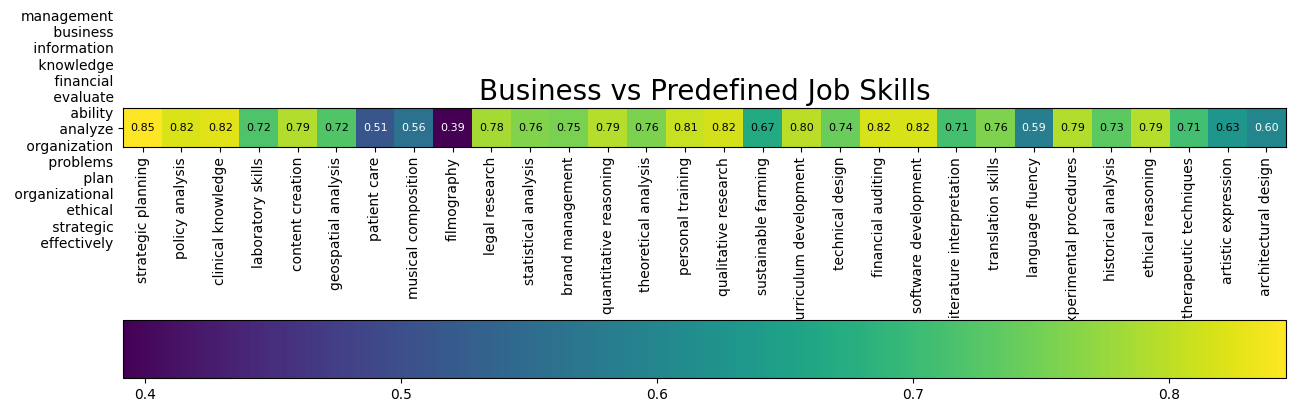

Business topic is most similar to:
strategic planning: 0.85
clinical knowledge: 0.82
policy analysis: 0.82


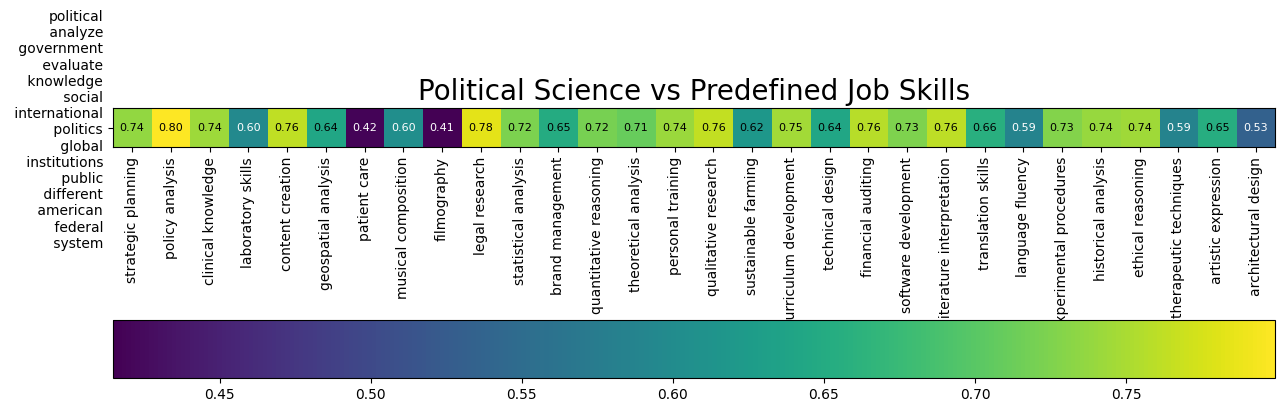

Political Science topic is most similar to:
policy analysis: 0.80
legal research: 0.78
qualitative research: 0.76


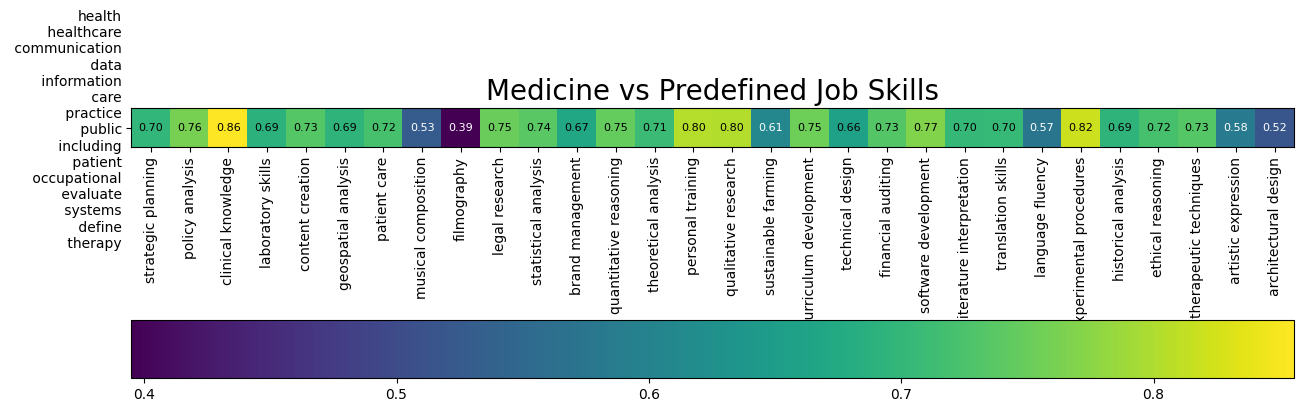

Medicine topic is most similar to:
clinical knowledge: 0.86
experimental procedures: 0.82
personal training: 0.80


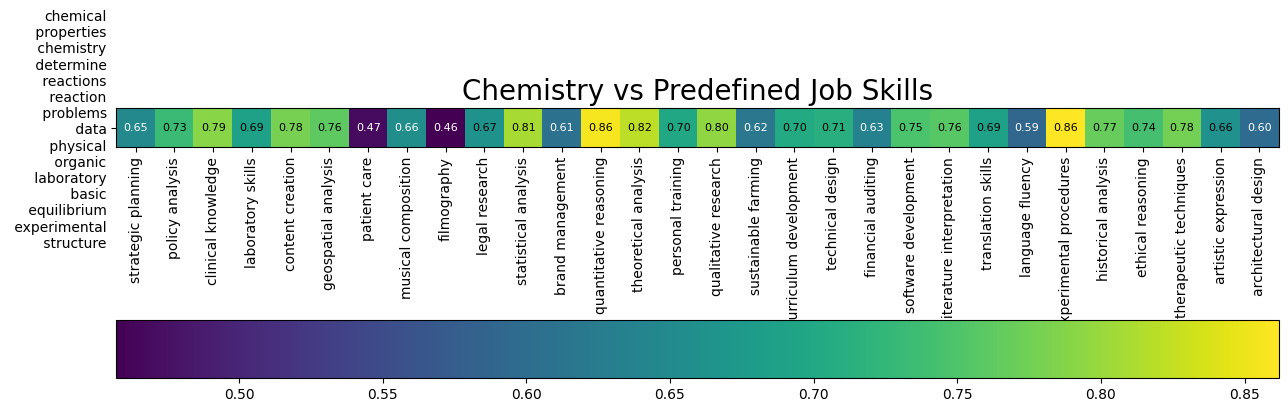

Chemistry topic is most similar to:
experimental procedures: 0.86
quantitative reasoning: 0.86
theoretical analysis: 0.82


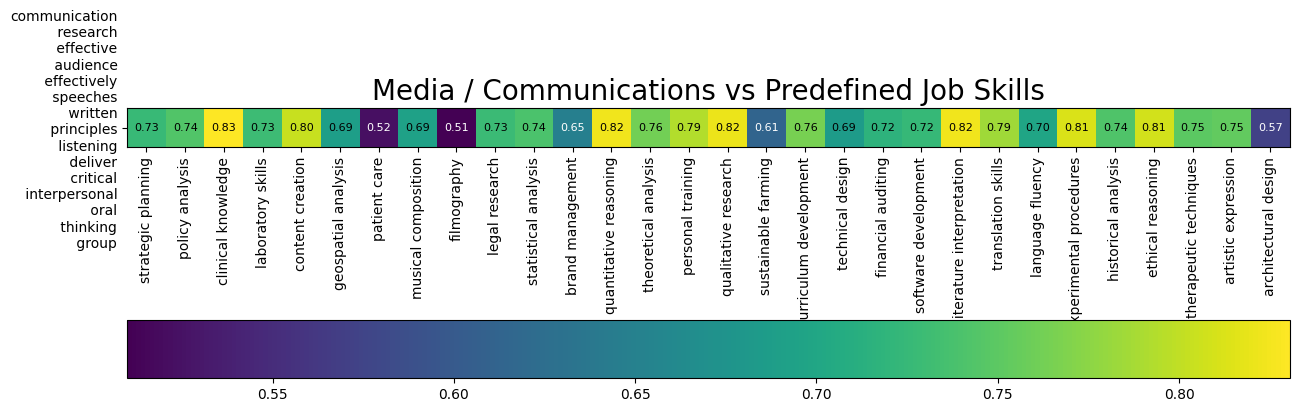

Media / Communications topic is most similar to:
clinical knowledge: 0.83
literature interpretation: 0.82
quantitative reasoning: 0.82


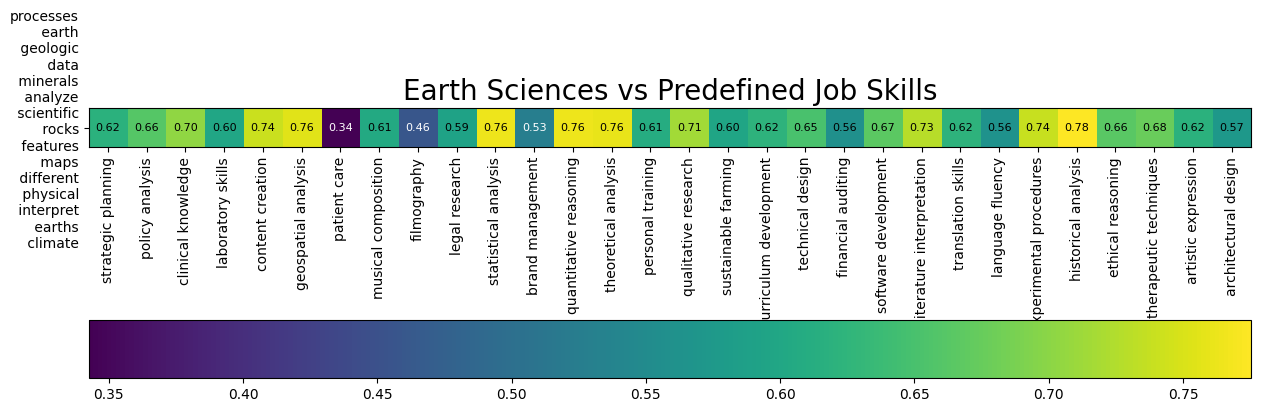

Earth Sciences topic is most similar to:
historical analysis: 0.78
quantitative reasoning: 0.76
statistical analysis: 0.76


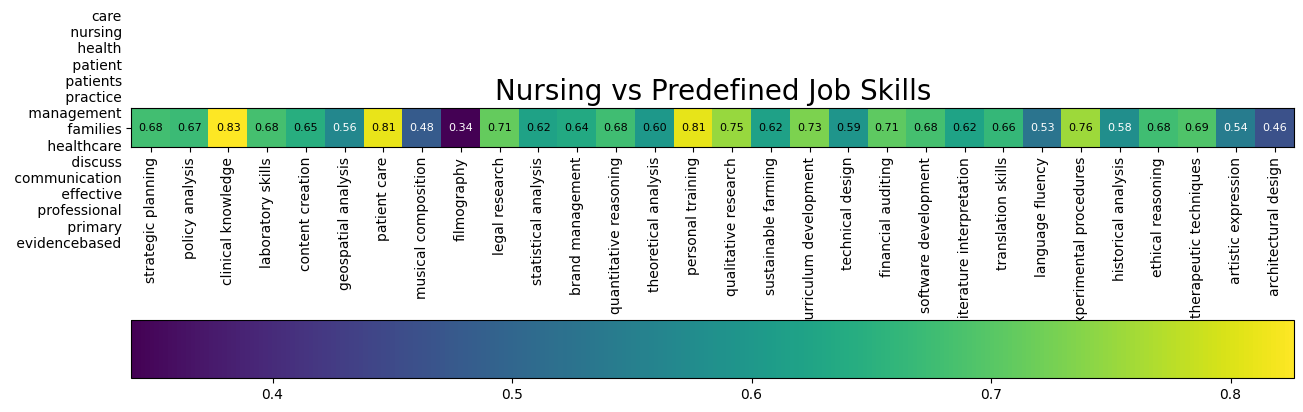

Nursing topic is most similar to:
clinical knowledge: 0.83
patient care: 0.81
personal training: 0.81


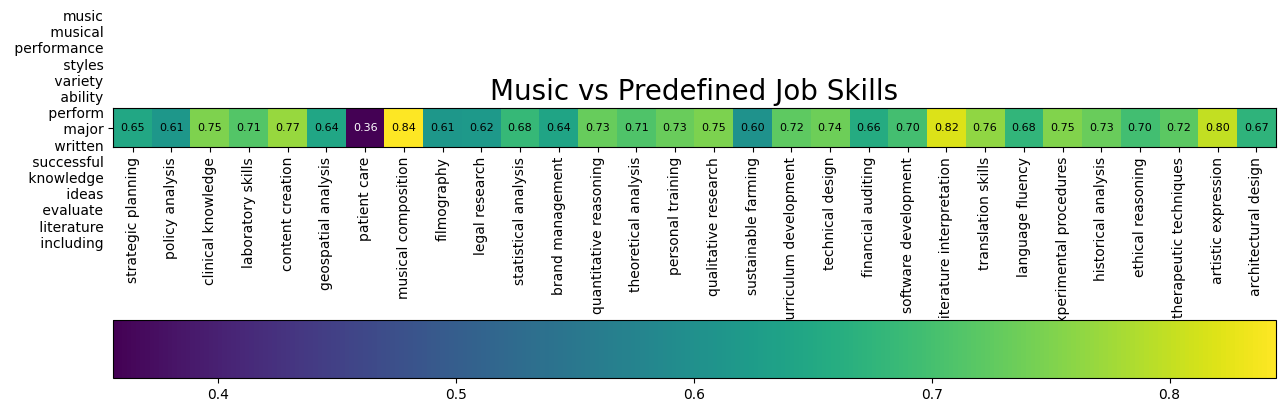

Music topic is most similar to:
musical composition: 0.84
literature interpretation: 0.82
artistic expression: 0.80


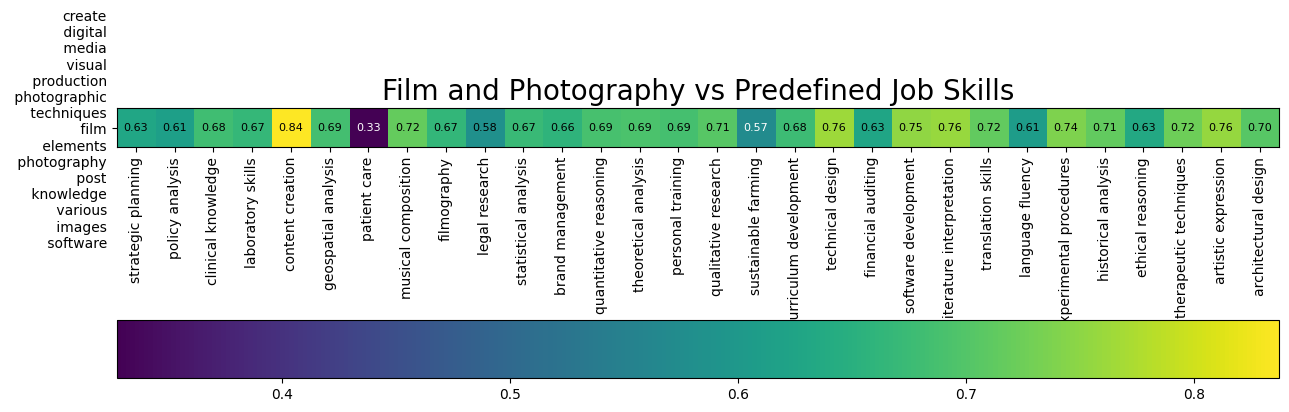

Film and Photography topic is most similar to:
content creation: 0.84
technical design: 0.76
literature interpretation: 0.76


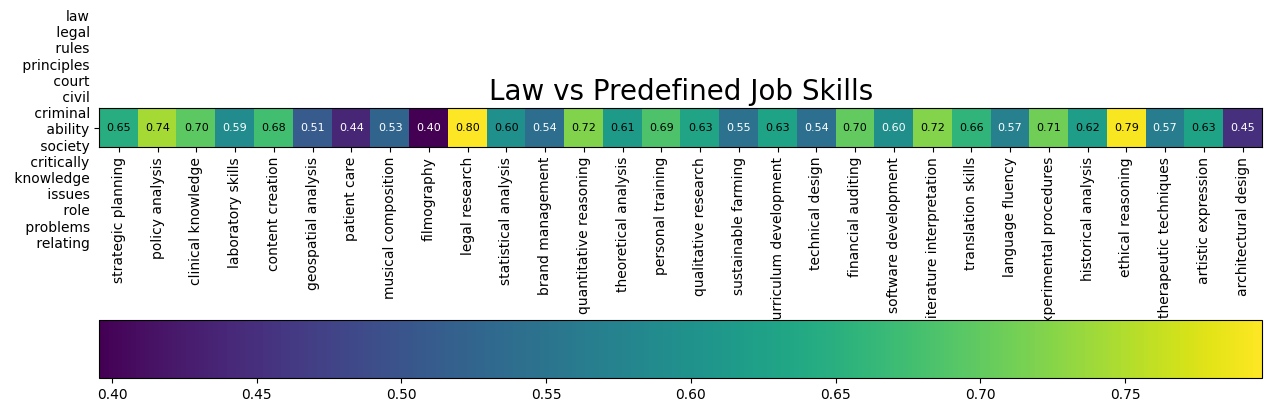

Law topic is most similar to:
legal research: 0.80
ethical reasoning: 0.79
policy analysis: 0.74


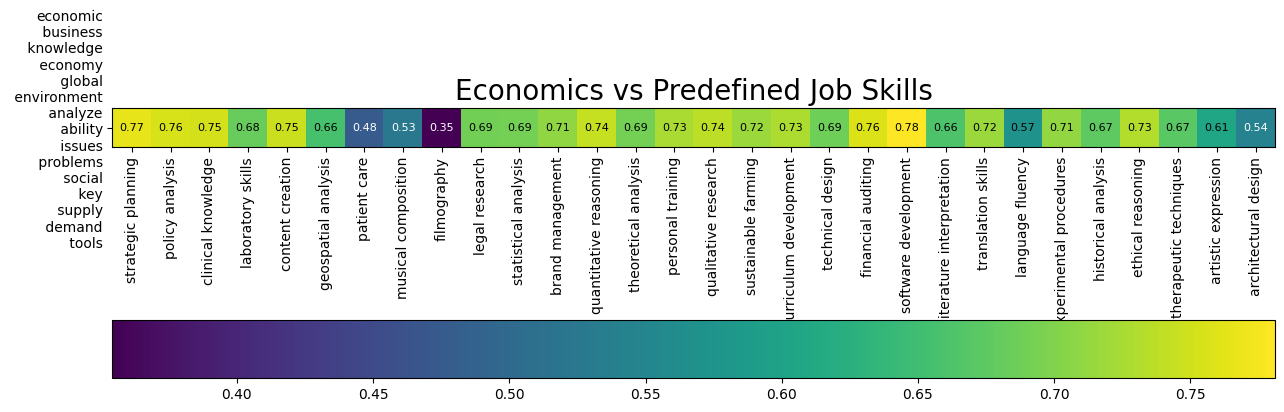

Economics topic is most similar to:
software development: 0.78
strategic planning: 0.77
financial auditing: 0.76


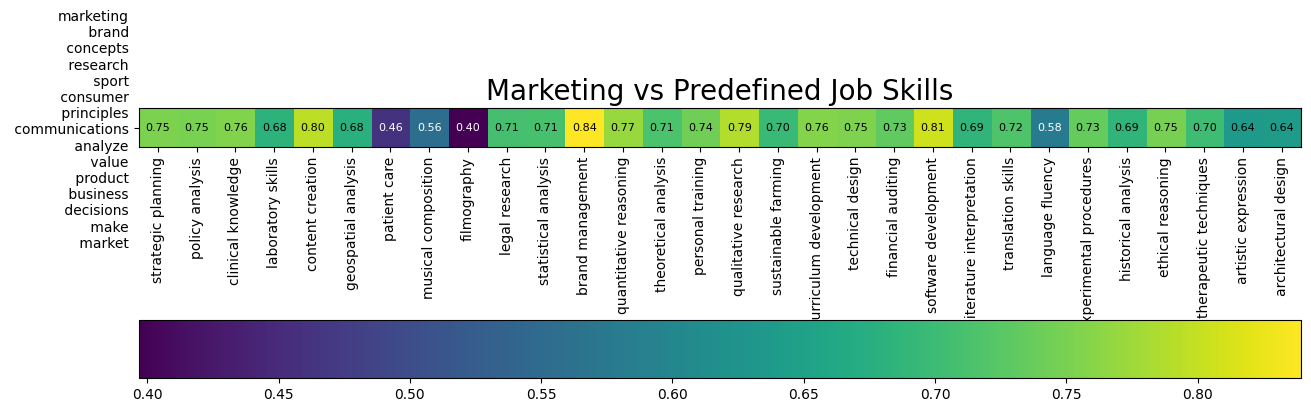

Marketing topic is most similar to:
brand management: 0.84
software development: 0.81
content creation: 0.80


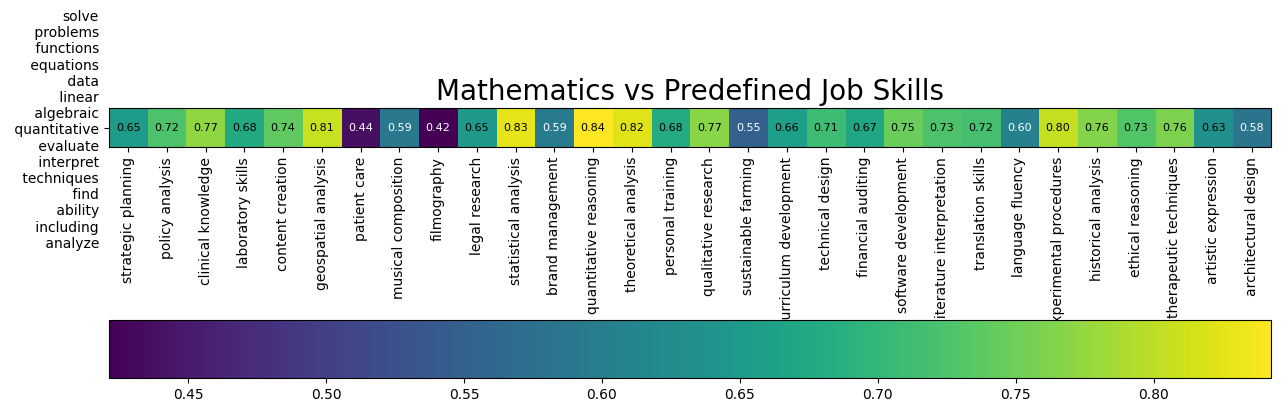

Mathematics topic is most similar to:
quantitative reasoning: 0.84
statistical analysis: 0.83
theoretical analysis: 0.82


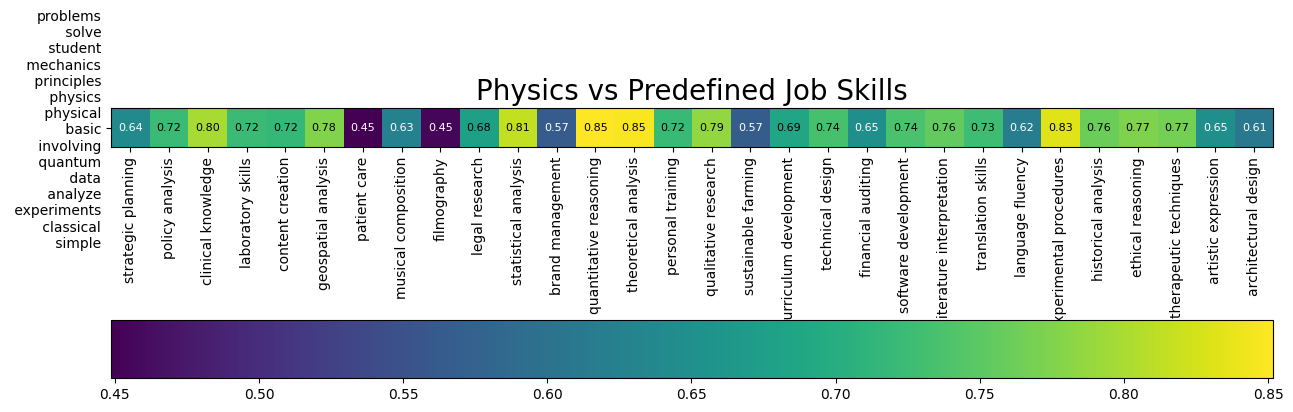

Physics topic is most similar to:
quantitative reasoning: 0.85
theoretical analysis: 0.85
experimental procedures: 0.83


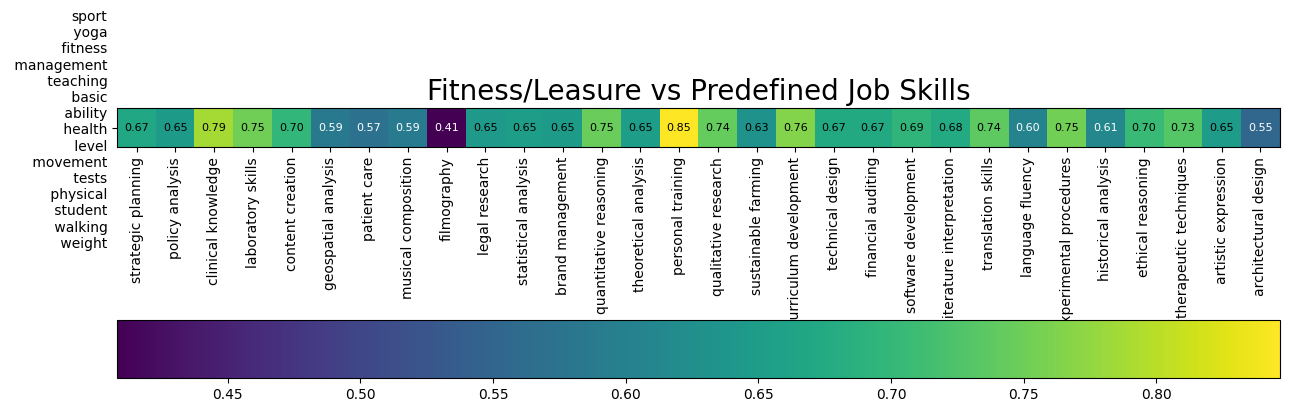

Fitness/Leasure topic is most similar to:
personal training: 0.85
clinical knowledge: 0.79
curriculum development: 0.76


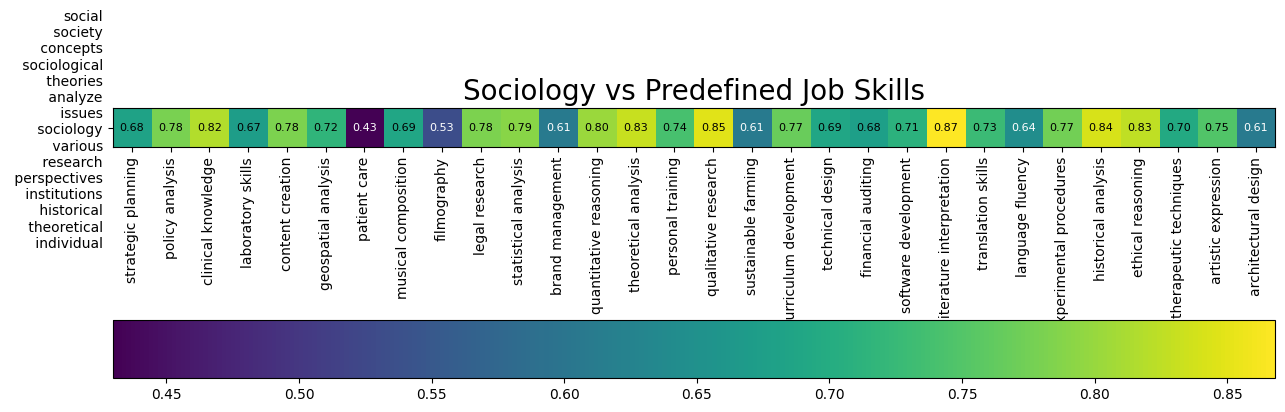

Sociology topic is most similar to:
literature interpretation: 0.87
qualitative research: 0.85
historical analysis: 0.84


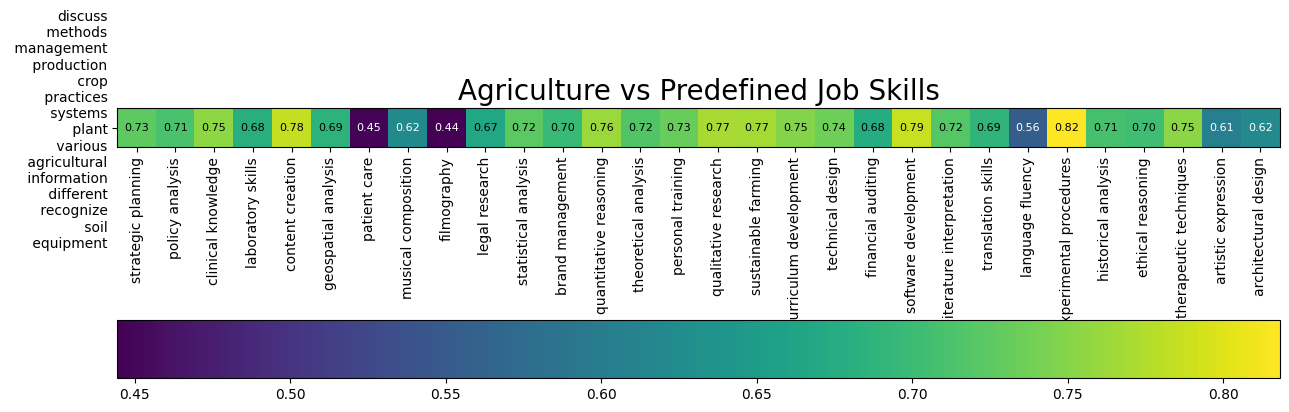

Agriculture topic is most similar to:
experimental procedures: 0.82
software development: 0.79
content creation: 0.78


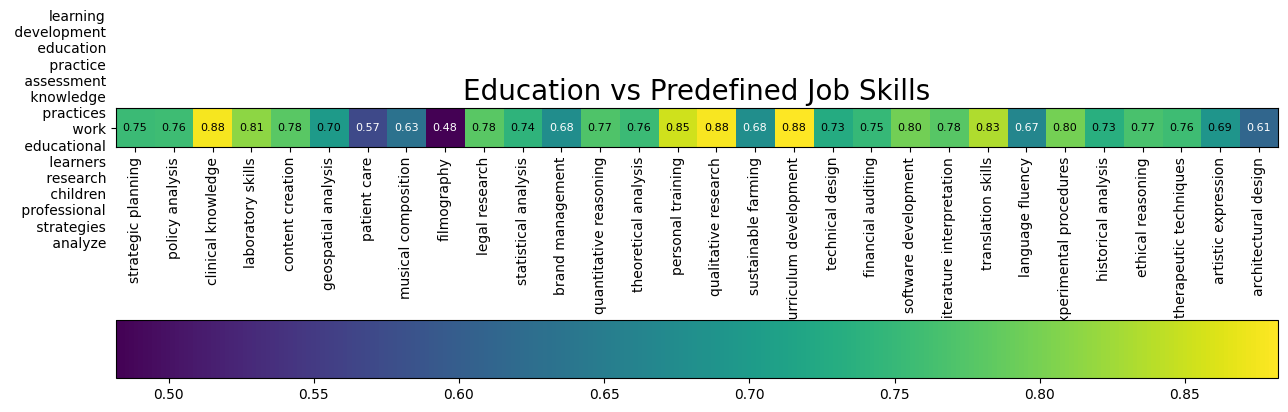

Education topic is most similar to:
curriculum development: 0.88
qualitative research: 0.88
clinical knowledge: 0.88


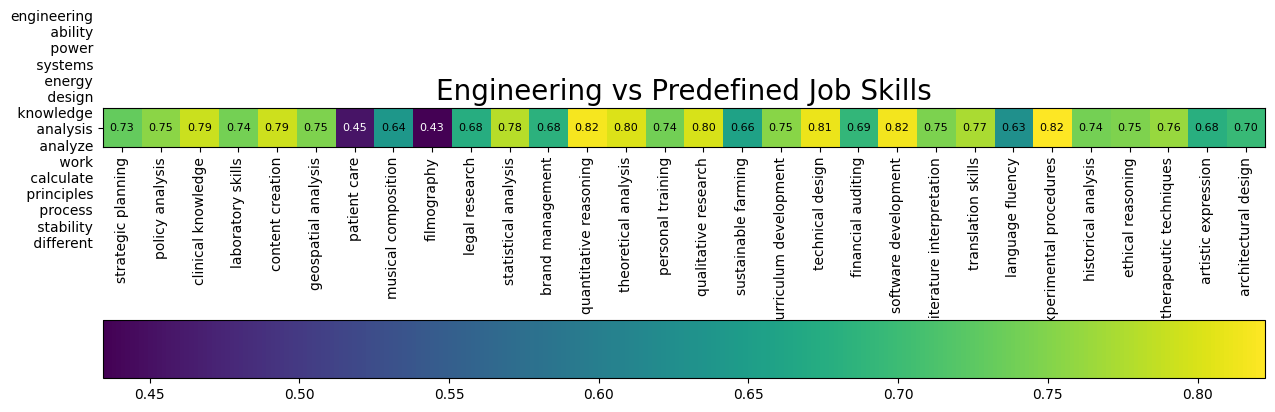

Engineering topic is most similar to:
experimental procedures: 0.82
quantitative reasoning: 0.82
software development: 0.82


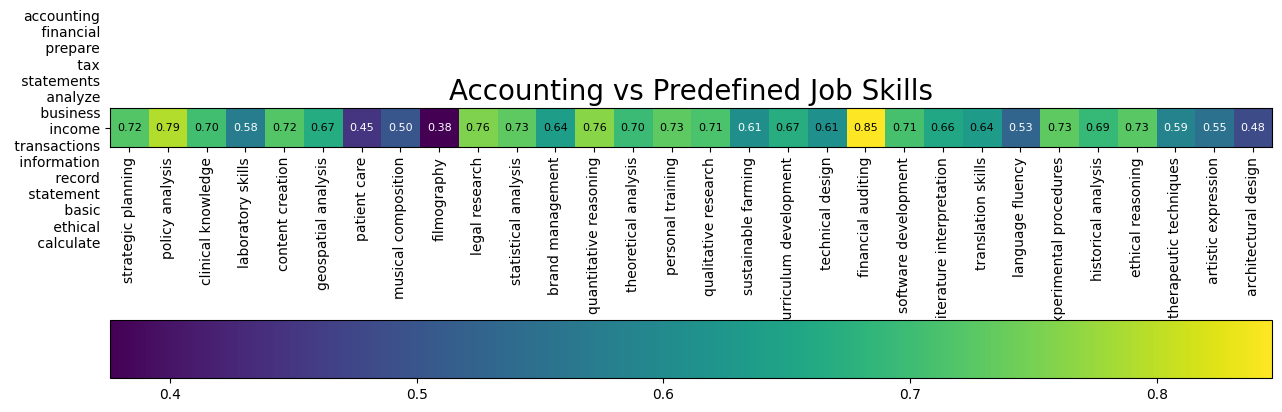

Accounting topic is most similar to:
financial auditing: 0.85
policy analysis: 0.79
quantitative reasoning: 0.76


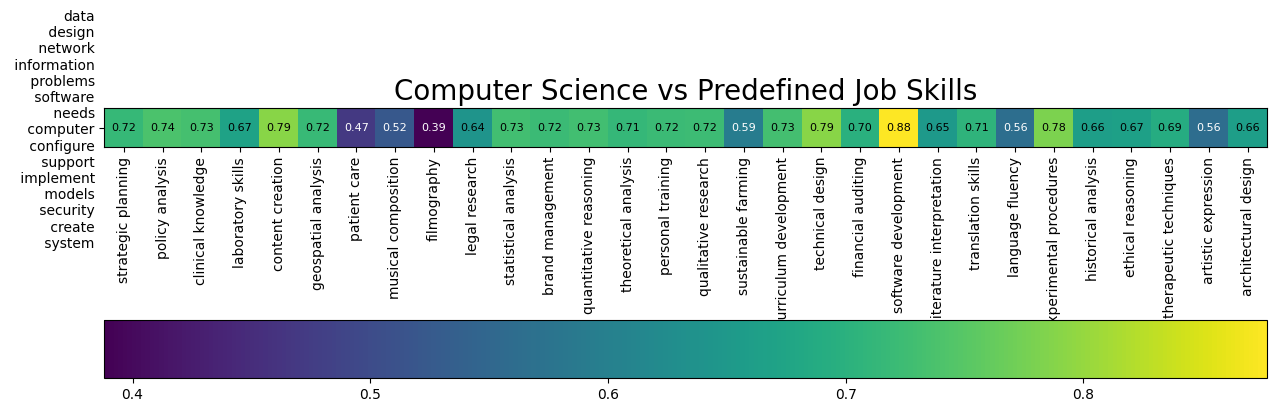

Computer Science topic is most similar to:
software development: 0.88
technical design: 0.79
content creation: 0.79


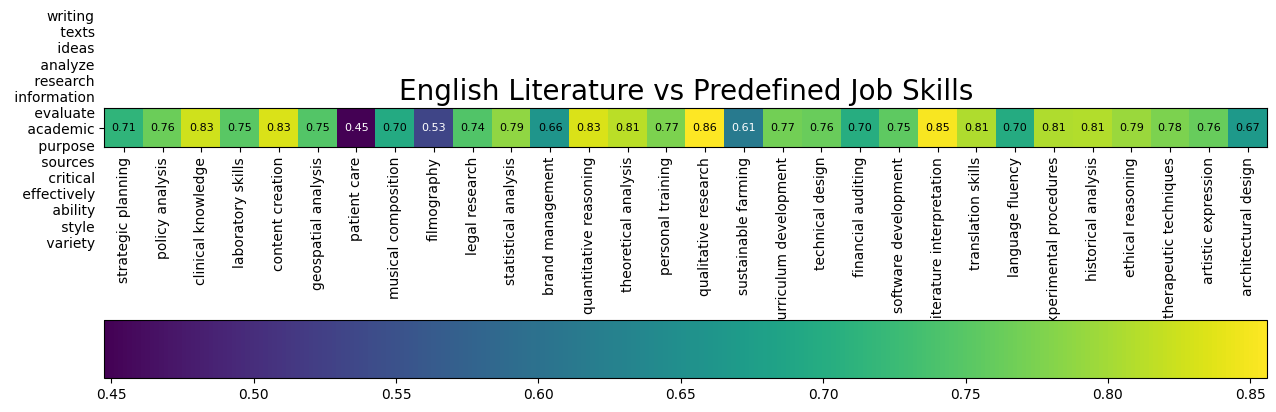

English Literature topic is most similar to:
qualitative research: 0.86
literature interpretation: 0.85
quantitative reasoning: 0.83


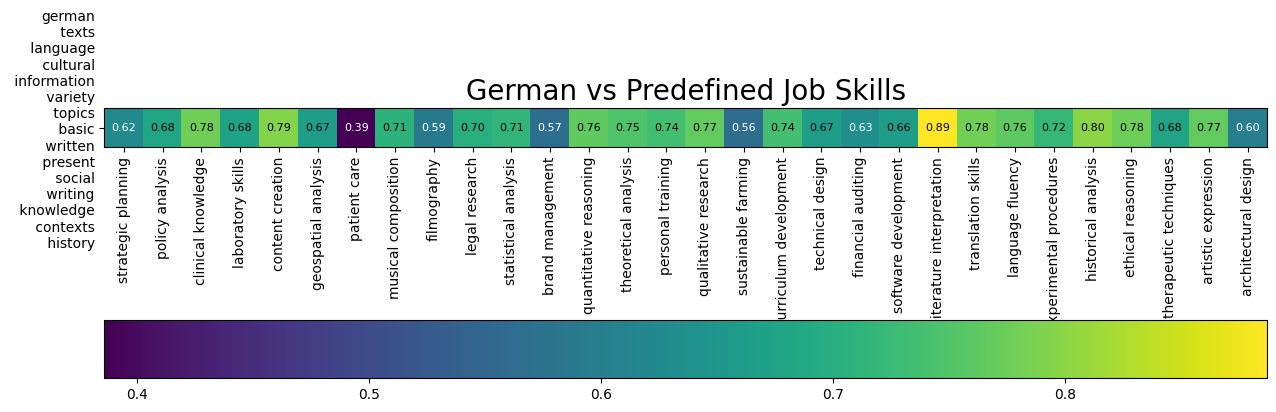

German topic is most similar to:
literature interpretation: 0.89
historical analysis: 0.80
content creation: 0.79


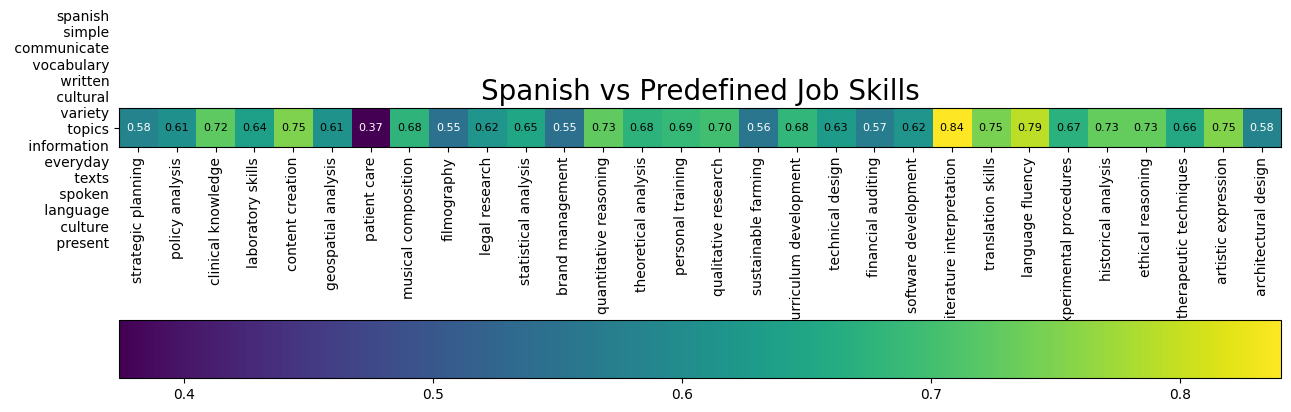

Spanish topic is most similar to:
literature interpretation: 0.84
language fluency: 0.79
artistic expression: 0.75


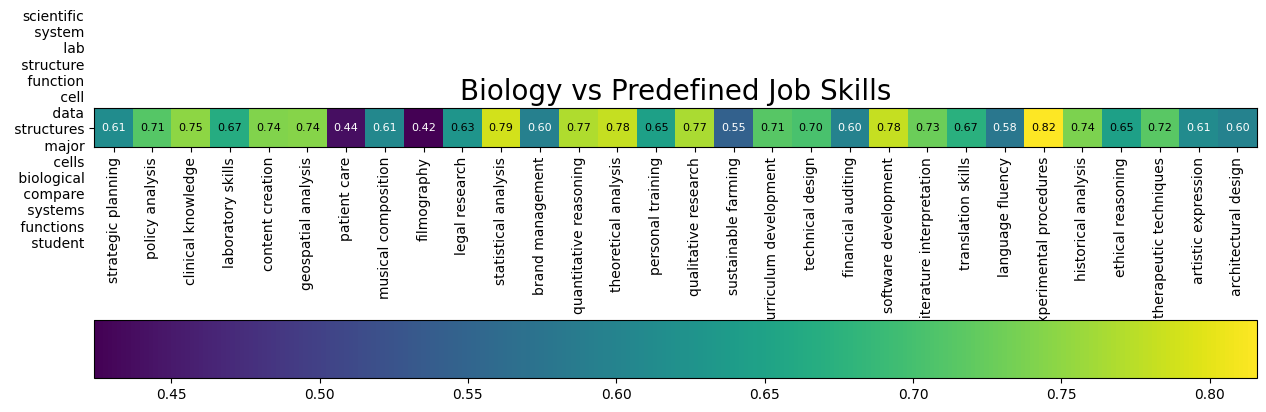

Biology topic is most similar to:
experimental procedures: 0.82
statistical analysis: 0.79
theoretical analysis: 0.78


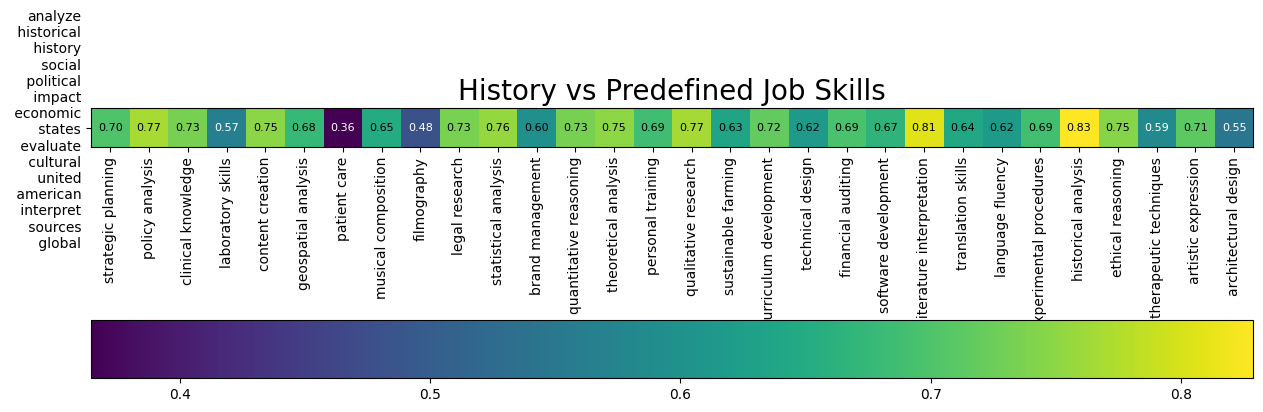

History topic is most similar to:
historical analysis: 0.83
literature interpretation: 0.81
policy analysis: 0.77


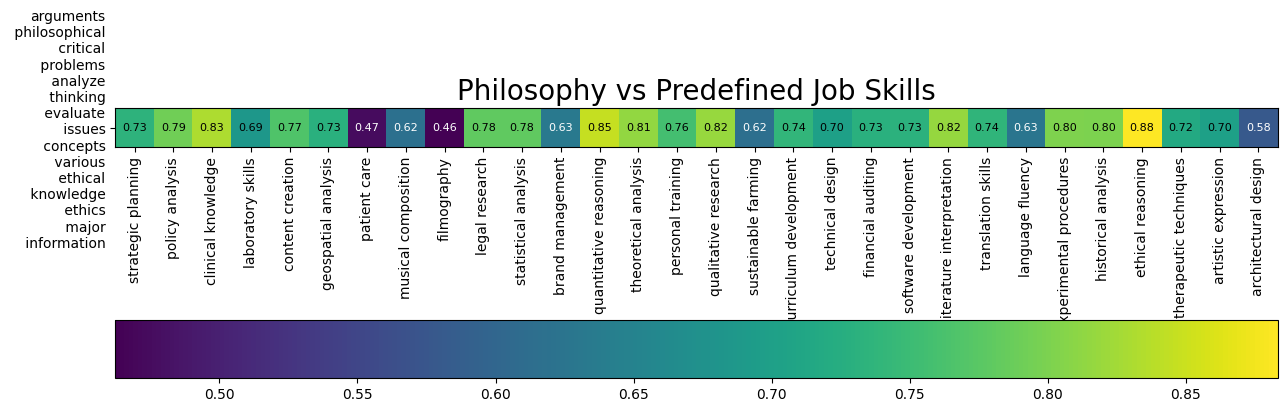

Philosophy topic is most similar to:
ethical reasoning: 0.88
quantitative reasoning: 0.85
clinical knowledge: 0.83


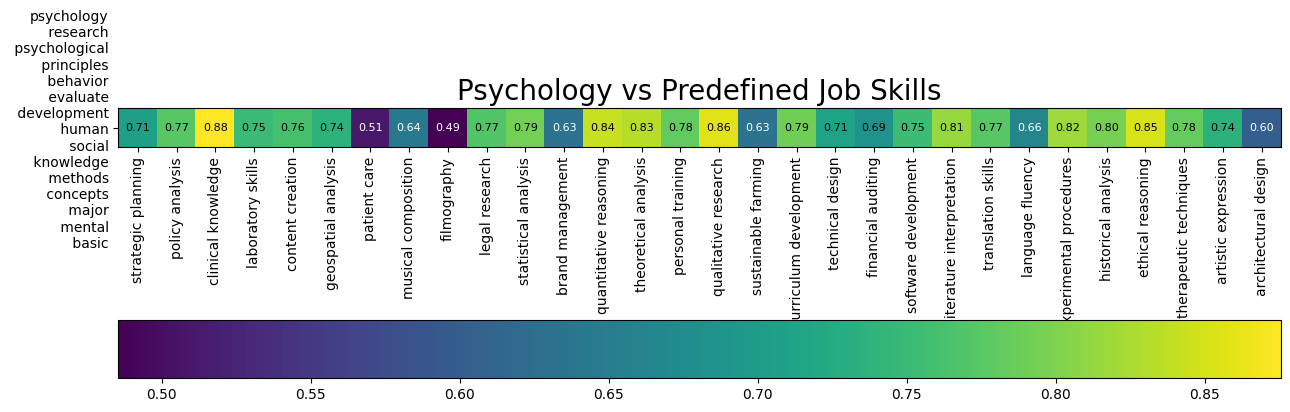

Psychology topic is most similar to:
clinical knowledge: 0.88
qualitative research: 0.86
ethical reasoning: 0.85


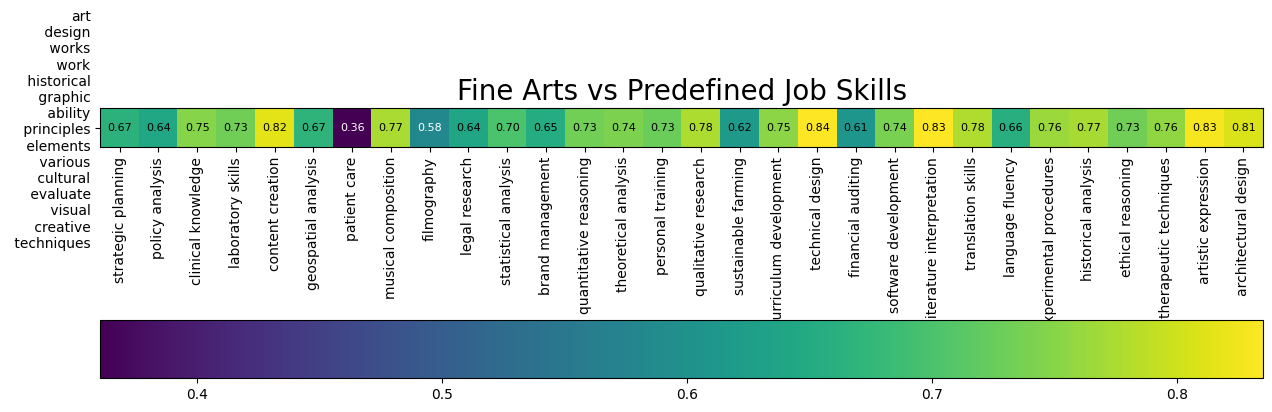

Fine Arts topic is most similar to:
technical design: 0.84
literature interpretation: 0.83
artistic expression: 0.83


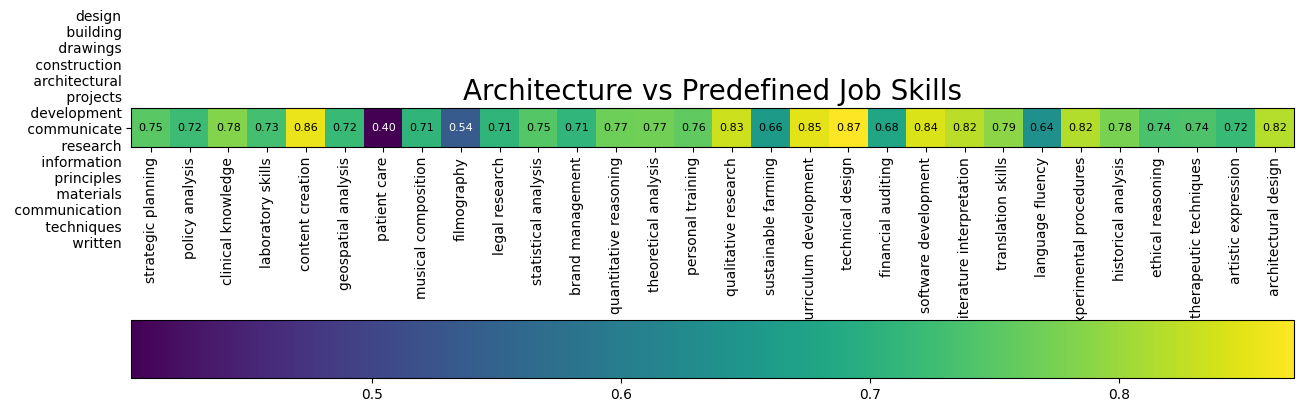

Architecture topic is most similar to:
technical design: 0.87
content creation: 0.86
curriculum development: 0.85


In [30]:
predefined_skills = [
    'strategic planning',          # Business
    'policy analysis',             # Political Science
    'clinical knowledge',          # Medicine
    'laboratory skills',           # Chemistry
    'content creation',            # Media / Communications
    'geospatial analysis',         # Earth Sciences
    'patient care',                # Nursing
    'musical composition',         # Music
    'filmography',                 # Film and Photography
    'legal research',              # Law
    'statistical analysis',        # Economics
    'brand management',            # Marketing
    'quantitative reasoning',      # Mathematics
    'theoretical analysis',        # Physics
    'personal training',           # Fitness/Leisure
    'qualitative research',        # Sociology
    'sustainable farming',         # Agriculture
    'curriculum development',      # Education
    'technical design',            # Engineering
    'financial auditing',          # Accounting
    'software development',        # Computer Science
    'literature interpretation',   # English Literature
    'translation skills',          # German
    'language fluency',            # Spanish
    'experimental procedures',     # Biology
    'historical analysis',         # History
    'ethical reasoning',           # Philosophy
    'therapeutic techniques',      # Psychology
    'artistic expression',         # Fine Arts
    'architectural design'         # Architecture
]

skill_vectors = [get_average_vector([skill]) for skill in predefined_skills]


def create_cosine_similarity_heatmap(title, avg_vector1, avg_vector2, labels1, labels2, cmap='inferno') -> np.ndarray:
    """
    Creates a heatmap of cosine similarities between two sets of average word vectors.
    Args:
    title (str): The title of the plot.
    avg_vector1 (np.ndarray): The average word vectors for the first set of words.
    avg_vector2 (np.ndarray): The average word vectors for the second set of words.
    labels1 (list): The labels for the first set of words.
    labels2 (list): The labels for the second set of words.
    cmap (str): The colormap to use for the heatmap.

    Returns:
    np.ndarray: The cosine similarity matrix.
    """
    plt.figure(figsize=(15, 15))
    plt.title(title, fontsize=20)
    similarities = cosine_similarity(avg_vector1, avg_vector2)

    plt.imshow(similarities, cmap=cmap, interpolation='nearest')

   # Calculate the midpoint of the colormap range
    min_val, max_val = similarities.min(), similarities.max()
    midpoint = (max_val + min_val) / 2.0

    for i in range(similarities.shape[0]):
        for j in range(similarities.shape[1]):
            # Choose text color based on comparison with midpoint
            text_color = 'white' if similarities[i, j] < midpoint else 'black'
            plt.text(j, i, f'{similarities[i, j]:.2f}', ha='center',
                     va='center', fontsize=8, color=text_color)

    plt.yticks(range(len(labels1)), labels1, rotation=0)
    plt.xticks(range(len(labels2)), labels2, rotation=90)
    plt.colorbar(location='bottom')
    # save the image using first word in the title
    first_word = title.split()[0]
    # escape the forward slash in any titles
    first_word = first_word.replace('/', '-')
    plt.savefig(f'./figures/{first_word}.png', dpi=300, bbox_inches='tight')
    plt.show()
    return similarities


# create a heatmap for each subject code vs job description topic
for subject, lda, vectorizer in subject_lda_models:
    top_words_lo = get_topic_keywords(lda, vectorizer.get_feature_names_out())

    average_vector_lo = [get_average_vector(words) for words in top_words_lo]
    topic_labels_lo = topic_labels(top_words_lo)

    s_matrix = create_cosine_similarity_heatmap(
        f'{subject} vs Predefined Job Skills', average_vector_lo, skill_vectors, topic_labels_lo, predefined_skills, cmap='viridis')
    # print the top 3 predefined skills with highest similarity to each subject topic
    for i, row in enumerate(s_matrix):
        top_3 = np.argsort(row)[::-1][:3]
        print(f'{subject} topic is most similar to:')
        for j in top_3:
            print(f'{predefined_skills[j]}: {row[j]:.2f}')

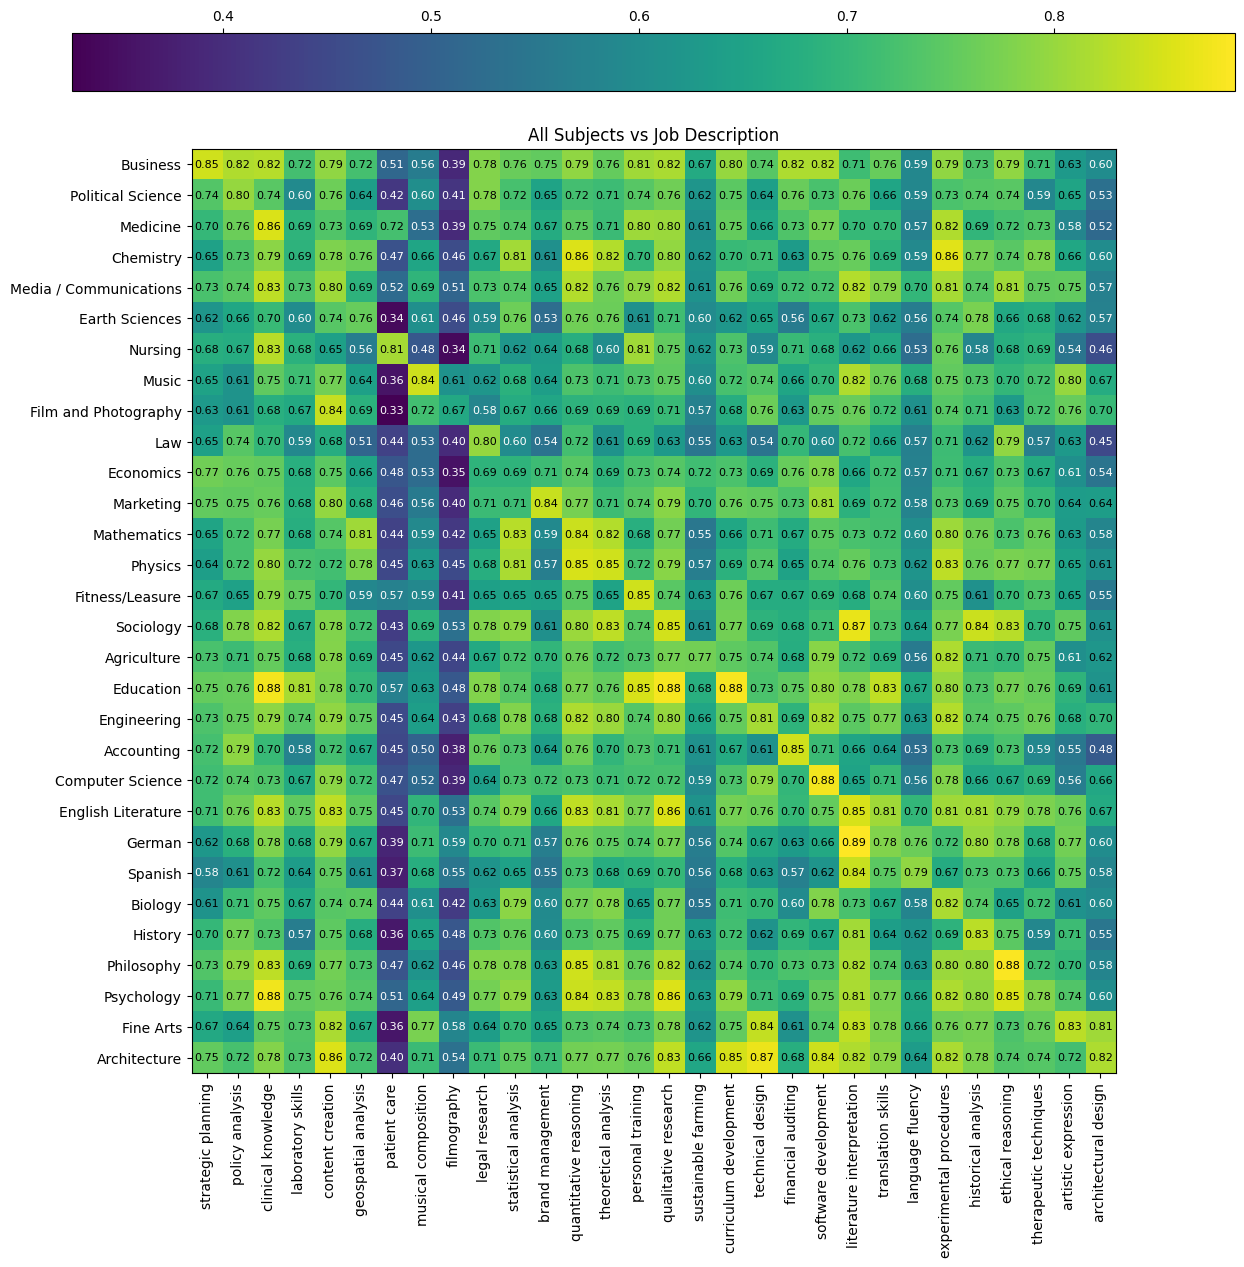

array([[0.8455631 , 0.8191495 , 0.824304  , 0.71984655, 0.79305583,
        0.7215811 , 0.5133524 , 0.56337833, 0.39137405, 0.78358334,
        0.76000094, 0.7535188 , 0.7941344 , 0.7552699 , 0.80661714,
        0.8161571 , 0.6696564 , 0.7977568 , 0.7410011 , 0.8185634 ,
        0.81862104, 0.71215653, 0.7578609 , 0.58598405, 0.7932248 ,
        0.73161817, 0.79459196, 0.70986676, 0.6296119 , 0.600437  ],
       [0.737729  , 0.799364  , 0.7437205 , 0.5954083 , 0.76259077,
        0.6419467 , 0.41822466, 0.60443676, 0.41457722, 0.7834512 ,
        0.7240081 , 0.6511631 , 0.7206198 , 0.7104053 , 0.7410255 ,
        0.7644985 , 0.6180806 , 0.7467209 , 0.64297163, 0.758031  ,
        0.7255957 , 0.76053894, 0.6572701 , 0.58640456, 0.7280912 ,
        0.73972106, 0.74441326, 0.5871523 , 0.6548336 , 0.5347887 ],
       [0.7000718 , 0.7602943 , 0.8556359 , 0.6909384 , 0.73392487,
        0.69440794, 0.7224287 , 0.5298332 , 0.3949782 , 0.75083864,
        0.7376492 , 0.6706631 , 0.7462139 , 0.

In [22]:

subjects = [subject for subject, _, _ in subject_lda_models]
# stack the average word vectors for each subject into a single matrix for all subjects
all_subjects_avg_vector = np.vstack(
    [get_average_vector(words)
     for _, lda, vectorizer in subject_lda_models
     for words in get_topic_keywords(lda, vectorizer.get_feature_names_out())])
create_cosine_similarity_heatmap('All Subjects vs Job Description', all_subjects_avg_vector,
                                 skill_vectors, subjects, predefined_skills, cmap='viridis')